In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, UnexpectedAlertPresentException, NoAlertPresentException

In [2]:
wd = webdriver.Chrome()

In [3]:
wd.get('http://www.library.tufts.edu/ezproxy/ezproxy.asp?LOCATION=RsrcRcrdFactiva')

In [4]:
switch_factiva = WebDriverWait(wd, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'nf-toggle-switch'))
)

In [5]:
switch_factiva.click()

In [6]:
query = """
Hepatitis C not ("Hepatitis C Times Newspapers Ltd" or "Hepatitis C The Financial Times Limited") and (rst=st or rst=sundti or rst=t or rst=timeuk or rst=dt or rst=stel or rst=TELUK or rst=ob or rst=IND or rst=INDOP or rst=INDOS or rst=IIND or rst=grdn or rst=GRULTD or rst=ftft or rst=ftcom or rst=thesun or rst=thesuk or rst=daim or rst=mosm or rst=damonl or rst=theexp or rst=thexsu or rst=exco or rst=dmirr or rst=smirr or rst=miruk or rst=POPL or rst=daista or rst=dsun or rst=daico or rst=ns or rst=nsonl or rst=metro)
""".strip()

In [7]:
wd.find_element(By.CLASS_NAME, "css-wiv1jh").send_keys(query + '\n')

In [10]:
year_of_first_result_on_page = WebDriverWait(wd, 15).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'css-1tryk67'))
).text

In [11]:
year_of_first_result_on_page

'24 February 1982'

In [8]:
# get all dates
wd.find_elements(By.CLASS_NAME, "css-1dbgxjr")[-1].click()

In [9]:
wd.find_elements(By.CLASS_NAME, "css-157mval")[-1].click()

In [10]:
y = "2020"
m = "August"
d = "1"

In [11]:
date_selects = WebDriverWait(wd, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'css-idt3y3'))
)

In [12]:
date_selects[0].send_keys(y)

In [13]:
date_selects[1].send_keys(m[:3])

In [14]:
existing_day = WebDriverWait(wd, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'css-1s3sgzy'))
)[2]
given_minus_existing = int(d) - int(existing_day.text)
if given_minus_existing > 0:
    print(given_minus_existing)
else:
    print(given_minus_existing)

-14


In [15]:
date_selects[2].send_keys("01")

In [16]:
#    css-rnn67r
done_button = WebDriverWait(wd, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'css-rnn67r'))
)
done_button.click()

In [10]:
wd.find_elements(By.CLASS_NAME, "css-157mval")[-2].click()

In [11]:
# change to oldest first
wd.find_elements(By.CLASS_NAME, "css-1dbgxjr")[0].click()

In [12]:
wd.find_elements(By.CLASS_NAME, "css-157mval")[-1].click()

In [13]:
# get articles
page_results = wd.find_elements(By.CLASS_NAME, "css-xtyr4m")
len(page_results)

20

In [14]:
page_results[0].click()

In [15]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(wd.find_element(By.TAG_NAME, "article").get_attribute("innerHTML"), 'html.parser')
soup.h1.get_text()

'Technology: Antigen diagnostic kit for hepatitis - The first biotechnology products are set for the market DAVID FISHLOCK reports'

In [16]:
soup.find('div', class_="styled-wrappers__ExternalControlWrapper-sc-15q75tq-1 enwsIg").get_text()

' By DAVID FISHLOCK;  Financial Times, 24 February 1982, 910 words, English'

In [17]:
soup.find('div', class_="body-paragraph__BodyParagraphWrapper-sc-1c0tve-0 gByVbi").get_text()

"Biogen, the biotechnology research company, expects its first genetically engineered product to reach the market next year. It will be a spin-off from a bigger project designed to develop genetically engineered vaccines against hepatitis in both man and animals.The first product will be a diagnostic kit for the rapid diagnosis of the disease without need for elaborate analytical tools or skills. The kit is to be based on an antigen developed by recombinant DNA technique initiated at Heidelburg University, then developed by Biogen's Geneva laboratories under the guidance of Professor Ken Murray of Edinburgh University.Four yearsBiogen will be supplying the antigen from a 'production' fermenter of 300 litres capacity, to its licencee, the Japanese pharmaceutical group Green Cross, to incorporate in its kit.According to Dr Walter Gilbert, Biogen's Nobel prizewinning chairman, sales of the kit are likely to total only hundreds of thousands of dollars. But he sees it as a spin-off from Bio

In [18]:
wd.find_element(By.ID, "articleBackButton").click()

In [19]:
# next page
wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [20]:
wd.find_element(By.CLASS_NAME, "css-1oqu26d").click()

In [24]:
wd.find_element(By.CLASS_NAME, "css-lakely").text.split()[-1]

'624'

In [2]:
import pandas as pd

df = pd.read_csv('hepatitis_c_articles.csv')
len(df)

4112

In [14]:
import os

df = pd.concat([pd.read_csv('factiva_data/hepc/'+f) for f in os.listdir('factiva_data/hepc')]+[pd.read_csv('hepatitis_c_articles.csv')]).drop_duplicates().reset_index(drop=True)

In [15]:
len(df)

9446

In [16]:
df.to_csv("hepc_factiva_0716.csv")

In [17]:
df

,Title,Byline,Text
0,Technology: Antigen diagnostic kit for hepatit...,"By DAVID FISHLOCK; Financial Times, 24 Febru...","Biogen, the biotechnology research company, ex..."
1,International Companies: Technology - Pounds 2...,"By DAVID FISHLOCK, SCIENCE EDITOR; Financial...",BRITAIN'S biotechnologists are to have a new P...
2,Financial Times Survey: China - Business - Gro...,"Financial Times, 29 October 1984, 1,411 words,...",CLIMATENorth China (including Beijing) - Winte...
3,The human face of science / Profile of Dr June...,"By THOMSON PRENTICE The Times, 1 July 1985, ...",Dr. June Goodfield has great faith in people's...
4,Travel: How to stay healthy on your summer bre...,"By ISABEL WALKER The Times, 6 July 1985, 1,1...",Holidays are one of the 30 most stressful even...
...,...,...,...
9441,'Laughing' man who hurled petrol bombs out of ...,"Michael Curzon,Paul Withers,Liam Doyle expre...",The man reportedly killed himself after throwi...
9442,Tribunal on Ireland’s infected blood scandal l...,"David Young Evening Standard Online, 8 Novem...",The UK inquiry heard from an expert on how the...
9443,Deadly silencing of the free press,"MARK HOOKHAM Mail on Sunday, 27 November 202...",The Mail on Sunday was pilloried as 'alarmist'...
9444,Eradicating Hepatitis C,"The Times, 28 December 2022, 588 words, English",An effective programme in the UK is among many...


In [35]:
to_export = df[:500]
to_export.to_csv("hepc_factiva_0716_first500.csv")

In [36]:
from docx import Document

doc = Document()
p = doc.add_heading('First 500 Hepatitis C Articles', 0)
p.bold = True

for i, row in to_export.iterrows():
    doc.add_heading(row['Title'], level=1)
    doc.add_paragraph(row['Byline'])
    doc.add_paragraph(row['Text'])
    doc.add_page_break()

doc.save('hepc_factiva_0716_first500.docx')

In [74]:
import pandas as pd
import os
files = sorted(['factiva_data/aids/'+f for f in os.listdir('factiva_data/aids')])
df = pd.concat([pd.read_csv(f) for f in files]).drop_duplicates().reset_index(drop=True)

In [75]:
df

,Title,Byline,Text
0,Soccer Aid's biggest line-up revealed with pop...,"Maz Iqbal express.co.uk, 19 March 2024, 12:0...",The Soccer Aid 2024 line-up has been announced...
1,Soccer Aid 2024 line-up in full as Bobby Brazi...,"By Daniel Bird Mirror.co.uk, 19 March 2024, ...",Soccer Aid is back with a huge line-up includi...
2,Only seven countries meet WHO air quality stan...,"Oliver Milman The Guardian, 19 March 2024, 4...",Almost all countries failing to meet mark for ...
3,How a daily shot of apple cider vinegar could ...,"CHARLOTTE DOVEY Daily Mail, 19 March 2024, 1...",GOOD HEALTHTHERE'S a definite buzz around appl...
4,US Kleenex plant contaminated drinking water w...,"Tom Perkins The Guardian, 19 March 2024, 11:...",Lawsuit also alleges ‘forever chemicals’ used ...
...,...,...,...
1426,Thousands receive apology after being incorrec...,"By Dan Sanderson, Scottish Correspondent The...","Scottish Government says process was ""complex""..."
1427,Trump has a strategy for discrediting Dr Fauci...,"Andrew Feinberg Independent Online, 14 July ...",This playbook was originally written for Rober...
1428,Face masks to be compulsory in shops in Englan...,Lucy Campbell and Matthew Weaver The Guardia...,Face coverings will be mandatory from 24 July ...
1429,Sydney hotel cluster rises to 30 – as it happened,Michael McGowan (now) and Calla Wahlquist (ea...,FOLLOW LIVE CORONAVIRUS UPDATES IN WEDNESDAY’S...


In [77]:
df2 = pd.read_csv('aids_factiva_0726_through_page_4156.csv')
df2

,Unnamed: 0,Title,Byline,Text
0,0,Opportunities to cut killer diseases toll / Br...,"By THOMSON PRENTICE, Science Correspondent T...",Plans that could lead to reducing the death to...
1,1,Spectrum: Waging war on heart disease (1528),"By THOMSON PRENTICE The Times, 27 August 198...",It was only when two army padres had come to h...
2,2,Workplace Cancer Risks 'Reduced To Minimum' / ...,"By DAVID FISHLOCK Financial Times, 28 August...",Most cancer hazards in the workplace have been...
3,3,British Association: Detention of Aids patient...,"The Times, 28 August 1985, 415 words, English",Compulsory powers to detain Aids patients in h...
4,4,Spectrum: Why our trees are dying (600),"By BOB SMYTH The Times, 28 August 1985, 713 ...",Town trees throughout Britain are suffering se...
...,...,...,...,...
85379,85379,"Oprah, 70, vehemently DEFENDS her Ozempic use ...","Kelsi Karruli For Dailymail.Com Mail Online,...",* The 70-year-old icon revealed she was no lon...
85380,85380,Biden told Netanyahu it would be a 'mistake' t...,"Emily Goodin, Senior U.S. Political Reporter ...",* White House National Security Adviser Jake S...
85381,85381,Israel raids Gaza’s biggest hospital,Andrew England in Jerusalem and Neri Zilber i...,Thousands of people have taken refuge in al-Sh...
85382,85382,Soccer Aid's biggest line-up revealed with pop...,"Maz Iqbal express.co.uk, 19 March 2024, 12:0...",The Soccer Aid 2024 line-up has been announced...


In [78]:
tot = pd.concat([df2, df]).drop_duplicates().reset_index(drop=True)
tot = tot[['Title', 'Byline', 'Text']]
tot

,Title,Byline,Text
0,Opportunities to cut killer diseases toll / Br...,"By THOMSON PRENTICE, Science Correspondent T...",Plans that could lead to reducing the death to...
1,Spectrum: Waging war on heart disease (1528),"By THOMSON PRENTICE The Times, 27 August 198...",It was only when two army padres had come to h...
2,Workplace Cancer Risks 'Reduced To Minimum' / ...,"By DAVID FISHLOCK Financial Times, 28 August...",Most cancer hazards in the workplace have been...
3,British Association: Detention of Aids patient...,"The Times, 28 August 1985, 415 words, English",Compulsory powers to detain Aids patients in h...
4,Spectrum: Why our trees are dying (600),"By BOB SMYTH The Times, 28 August 1985, 713 ...",Town trees throughout Britain are suffering se...
...,...,...,...
86810,Thousands receive apology after being incorrec...,"By Dan Sanderson, Scottish Correspondent The...","Scottish Government says process was ""complex""..."
86811,Trump has a strategy for discrediting Dr Fauci...,"Andrew Feinberg Independent Online, 14 July ...",This playbook was originally written for Rober...
86812,Face masks to be compulsory in shops in Englan...,Lucy Campbell and Matthew Weaver The Guardia...,Face coverings will be mandatory from 24 July ...
86813,Sydney hotel cluster rises to 30 – as it happened,Michael McGowan (now) and Calla Wahlquist (ea...,FOLLOW LIVE CORONAVIRUS UPDATES IN WEDNESDAY’S...


In [79]:
tot.to_csv('aids_factiva_0726.csv')

In [68]:
import re
import pandas as pd
tot = pd.read_csv('aids_factiva_0726_through_page_4156.csv')

In [69]:
tot['date'] = tot.apply(lambda x: re.search(r'\d{1,2}\s+\w+\s+\d{4}', x['Byline']).group(0), axis=1)

# cast tot[date] to datetime
tot['date'] = pd.to_datetime(tot['date'], format='%d %B %Y')

In [73]:
tot['date'].sort_values().iloc[-1].strftime('%Y-%m-%d')

'2024-03-19'

<Axes: xlabel='date', ylabel='Count'>

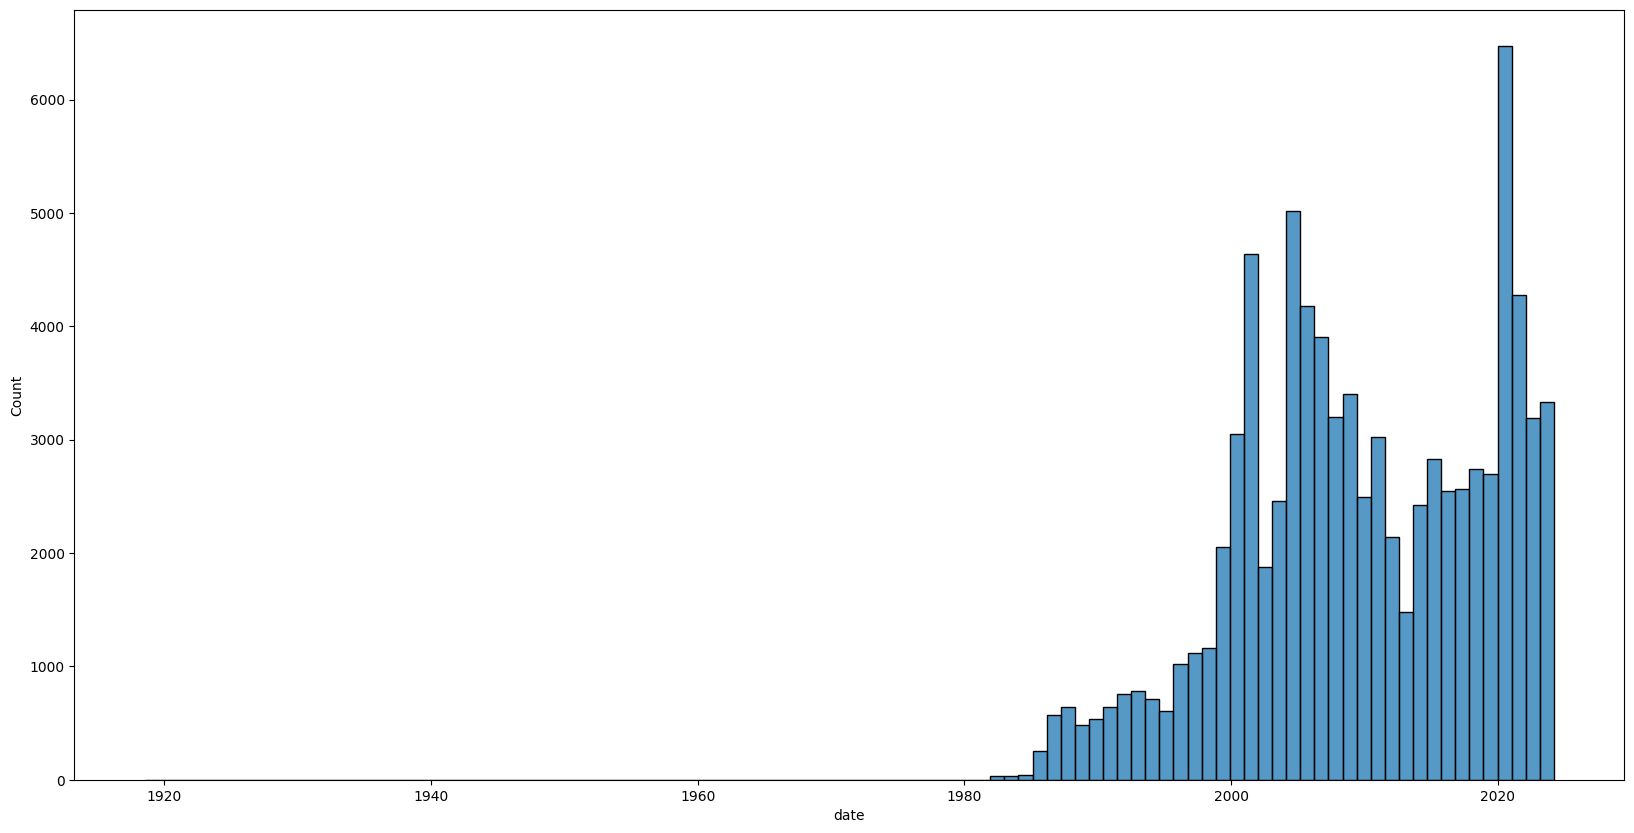

In [70]:
# plot date frequency as histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(tot['date'], bins=100)

In [91]:
tot.to_csv("aids_factiva_0722_through_page_1738.csv")

In [64]:
import glob

aids = pd.concat([pd.read_csv(f) for f in glob.glob('./aids_factiva_*_through_page_*.csv')]).reset_index(drop=True)

In [68]:
aids.to_csv("aids_factiva_0722_through_page_1738.csv")

In [67]:
len(aids)

23682

In [74]:
aids

,Unnamed: 0,Title,Byline,Text
0,0,\nThe West at War - The Hunted - LADEN HAS GON...,"\nBy GERARD COUZENS.\n The Sunday Mirror, 9 D...","\nAfter 63 days, tens of billions of dollars a..."
1,1,\nThe West at War - The Hunted - LADEN HAS GON...,"\nBy GERARD COUZENS.\n The Sunday Mirror, 9 D...","\nAfter 63 days, tens of billions of dollars a..."
2,2,Mouse clue to obesity - What's new - Spectrum.,"The Sunday Times, 9 December 2001, 111 words, ...",American researchers have genetically engineer...
3,3,\nCHRISTMAS APPEAL - IRISH KIDS NEED YOUR DONA...,"\nBy STEPHEN MAGUIRE.\n People, 9 December 20...",\nLAST week we launched our Christmas Appeal i...
4,4,"\nS&M The IoS sex column, with Suzi and Mel.\n","\nBy Suzi and Mel.\n Independent On Sunday, 9...","\n""There is something I need to tell you..."" E..."
...,...,...,...,...
23677,4574,\nThe West at War - The Hunted - LADEN HAS GON...,"\nBy GERARD COUZENS.\n The Sunday Mirror, 9 D...","\nAfter 63 days, tens of billions of dollars a..."
23678,4575,\nThe West at War - The Hunted - LADEN HAS GON...,"\nBy GERARD COUZENS.\n The Sunday Mirror, 9 D...","\nAfter 63 days, tens of billions of dollars a..."
23679,4576,Mouse clue to obesity - What's new - Spectrum.,"The Sunday Times, 9 December 2001, 111 words, ...",American researchers have genetically engineer...
23680,4577,\nCHRISTMAS APPEAL - IRISH KIDS NEED YOUR DONA...,"\nBy STEPHEN MAGUIRE.\n People, 9 December 20...",\nLAST week we launched our Christmas Appeal i...


In [73]:
import re
aids.apply(lambda x: re.search(r'\d{1,2}\s+\w+\s+\d{4}', x['Byline']).group(0), axis=1)
#aids['date'] = 

0        9 December 2001
1        9 December 2001
2        9 December 2001
3        9 December 2001
4        9 December 2001
              ...       
23677    9 December 2001
23678    9 December 2001
23679    9 December 2001
23680    9 December 2001
23681    9 December 2001
Length: 23682, dtype: object

In [41]:
aids_to_export = df[:500]
aids_to_export.to_csv("aids_factiva_0717_first500.csv")

In [42]:
from docx import Document

doc = Document()
p = doc.add_heading('First 500 AIDS Articles', 0)
p.bold = True

for i, row in aids_to_export.iterrows():
    doc.add_heading(row['Title'], level=1)
    doc.add_paragraph(row['Byline'])
    doc.add_paragraph(row['Text'])
    doc.add_page_break()

doc.save('aids_factiva_0717_first500.docx')

# Postproc

In [21]:
import pandas as pd
hepc = pd.read_csv("hepc_factiva_0716.csv")
aids = pd.read_csv("aids_factiva_0726.csv")

In [22]:
aids.iloc[-3].Byline

' Lucy Campbell and Matthew Weaver  The Guardian, 14 July 2020, 8:33 pm GMT, 12,438 words, English'

In [23]:
hepc.iloc[-3].Byline

' MARK HOOKHAM  Mail on Sunday, 27 November 2022, 850 words, English'

In [24]:
import re
aids['date'] = aids.apply(lambda x: re.search(r'\d{1,2}\s+\w+\s+\d{4}', x['Byline']).group(0), axis=1)
aids['date'] = pd.to_datetime(aids['date'], format='%d %B %Y')
aids = aids.sort_values(by='date')

In [28]:
aids = aids.reset_index(drop=True)   
aids

,Unnamed: 0,Title,Byline,Text,date
0,54535,Obituary: Obituary: Universally venerated hero...,"David Beresford Rolihlahla Nelson Mandela, st...","One must go back to Dallas, Texas, in 1963 to ...",1918-07-18
1,13379,The Financial Times has examined the possibili...,"Financial Times, 28 March 1981, 359 words, Eng...",Biotechnology is the use of living organisms i...,1981-03-28
2,13380,"Mr Arthur Scargill, president elect of the Nat...","Financial Times, 13 January 1982, 140 words, E...",Mr Scargill says that the National Coal Board ...,1982-01-13
3,13381,Companies and Markets: International Companies...,"By JOHN WICKS Financial Times, 20 January 19...",SWISS CHEMICAL companies are felling justifiab...,1982-01-20
4,13382,Leisure: Gardening - Parable of the sower,"By ARTHUR HELLYER Financial Times, 30 Januar...",ON THE window ledge is a little plastic seed t...,1982-01-30
...,...,...,...,...,...
86810,86542,"13 best electric toothbrushes, tried and teste...","Steve Hogarty Independent Online, 25 July 20...","From Philips to Oral-B, there are brushes to s...",2024-07-25
86811,86555,"Asphalt burns, delirium, body bags: extreme he...","Aliya Uteuova The Guardian, 26 July 2024, 4:...","More than 120,000 heat-related ER visits were ...",2024-07-26
86812,86552,Children in Gaza are now at risk of polio as w...,"Tedros Adhanom Ghebreyesus The Guardian, 26 ...",We are sending 1m polio vaccines to Gaza but m...,2024-07-26
86813,86553,Wood pellets production boomed to feed EU dema...,"James Pollard, Julie Watson and Stephen Smith...",Wood pellet production has skyrocketed across ...,2024-07-26


In [63]:
def get_author_name(x):
    x_split = x.split(',')
    for s in x_split:
        if ('By' in s):
            name_newspaper = s.split('By')[1].strip()
            if '  ' in name_newspaper:
                return name_newspaper.split('  ')[0]
            else:
                return name_newspaper
        elif ('BY' in s):
            name_newspaper = s.split('BY')[1].strip()
            if '  ' in name_newspaper:
                return name_newspaper.split('  ')[0]
            else:
                return name_newspaper
        else:
            if '  ' in s:
                return s.split('  ')[0].strip()
            else:
                return 'No author in byline'
        
aids.Byline.apply(get_author_name).iloc[48002]

'No author in byline'

In [66]:
name_parse_test = aids.Byline.apply(get_author_name)
name_parse_test

0                                    No author in byline
1                                    No author in byline
2                                    No author in byline
3                                             JOHN WICKS
4                                         ARTHUR HELLYER
                              ...                       
86810                                      Steve Hogarty
86811                                      Aliya Uteuova
86812                         Tedros Adhanom Ghebreyesus
86813                                No author in byline
86814    Tom Ambrose (now) and Charlie Moloney (earlier)
Name: Byline, Length: 86815, dtype: object

In [69]:
aids['author'] = aids.Byline.apply(get_author_name)

In [72]:
aids.Byline.iloc[1]

'Financial Times, 28 March 1981, 359 words, English'

In [115]:
uk_papers = [
    "Sunday Times",
    "Times",
    "Daily Telegraph",
    "Observer",
    "Independent",
    "Guardian",
    "Financial Times",
    "Sun",
    "Daily Mail",
    "Daily Express",
    "Daily Mirror",
    "Sunday People",
    "Daily Star",
    "Evening Standard",
    "Metro",
    "Mail on Sunday",
    "Sunday Mirror",
    "Express on Sunday",
    "Sunday Telegraph",
    "Sunday Express",
    "thesun.co.uk",
    "Mail Online",
    "Telegraph Online",
    "Mirror.co.uk",
    "thetimes.co.uk",
    "dailystar.co.uk"
]

def get_paper(x):
    if any([p in x for p in uk_papers]):
        newspaper = re.search(r'\b(?:{})\b'.format('|'.join(uk_papers)), x)
        if newspaper:
            return newspaper.group(0)
        else:
            return 'No UK newspaper found'

aids.Byline.apply(get_paper)

0               Guardian
1        Financial Times
2        Financial Times
3        Financial Times
4        Financial Times
              ...       
86810        Independent
86811           Guardian
86812           Guardian
86813        Independent
86814           Guardian
Name: Byline, Length: 86815, dtype: object

In [118]:
aids['newspaper'] = aids.Byline.apply(get_paper)

In [121]:
aids = aids[['Title', 'date', 'author', 'newspaper', 'Text']]
aids

,Title,date,author,newspaper,Text
0,Obituary: Obituary: Universally venerated hero...,1918-07-18,No author in byline,Guardian,"One must go back to Dallas, Texas, in 1963 to ..."
1,The Financial Times has examined the possibili...,1981-03-28,No author in byline,Financial Times,Biotechnology is the use of living organisms i...
2,"Mr Arthur Scargill, president elect of the Nat...",1982-01-13,No author in byline,Financial Times,Mr Scargill says that the National Coal Board ...
3,Companies and Markets: International Companies...,1982-01-20,JOHN WICKS,Financial Times,SWISS CHEMICAL companies are felling justifiab...
4,Leisure: Gardening - Parable of the sower,1982-01-30,ARTHUR HELLYER,Financial Times,ON THE window ledge is a little plastic seed t...
...,...,...,...,...,...
86810,"13 best electric toothbrushes, tried and teste...",2024-07-25,Steve Hogarty,Independent,"From Philips to Oral-B, there are brushes to s..."
86811,"Asphalt burns, delirium, body bags: extreme he...",2024-07-26,Aliya Uteuova,Guardian,"More than 120,000 heat-related ER visits were ..."
86812,Children in Gaza are now at risk of polio as w...,2024-07-26,Tedros Adhanom Ghebreyesus,Guardian,We are sending 1m polio vaccines to Gaza but m...
86813,Wood pellets production boomed to feed EU dema...,2024-07-26,No author in byline,Independent,Wood pellet production has skyrocketed across ...


In [122]:
aids.to_csv("aids_parsed_0801.csv")

In [123]:
hepc['date'] = hepc.apply(lambda x: re.search(r'\d{1,2}\s+\w+\s+\d{4}', x['Byline']).group(0), axis=1)
hepc['date'] = pd.to_datetime(hepc['date'], format='%d %B %Y')
hepc = hepc.sort_values(by='date')

In [124]:
hepc['author'] = hepc.Byline.apply(get_author_name)
hepc['newspaper'] = hepc.Byline.apply(get_paper)

In [125]:
hepc

,Unnamed: 0,Title,Byline,Text,date,author,newspaper
0,0,Technology: Antigen diagnostic kit for hepatit...,"By DAVID FISHLOCK; Financial Times, 24 Febru...","Biogen, the biotechnology research company, ex...",1982-02-24,DAVID FISHLOCK;,Financial Times
1,1,International Companies: Technology - Pounds 2...,"By DAVID FISHLOCK, SCIENCE EDITOR; Financial...",BRITAIN'S biotechnologists are to have a new P...,1983-02-11,DAVID FISHLOCK,Financial Times
2,2,Financial Times Survey: China - Business - Gro...,"Financial Times, 29 October 1984, 1,411 words,...",CLIMATENorth China (including Beijing) - Winte...,1984-10-29,No author in byline,Financial Times
3,3,The human face of science / Profile of Dr June...,"By THOMSON PRENTICE The Times, 1 July 1985, ...",Dr. June Goodfield has great faith in people's...,1985-07-01,THOMSON PRENTICE,Times
4,4,Travel: How to stay healthy on your summer bre...,"By ISABEL WALKER The Times, 6 July 1985, 1,1...",Holidays are one of the 30 most stressful even...,1985-07-06,ISABEL WALKER,Times
...,...,...,...,...,...,...,...
9393,9393,Inside the Filipino jails struggling to contai...,"By Sarah Newey, Global Health Security Corres...","As Covid showed, prisons can act as incubators...",2024-07-15,Sarah Newey,Telegraph Online
9398,9398,the a to z of summer heath hazards,"Natasha Holt The Daily Mirror, 16 July 2024,...",yourhealth@mirror.co.ukHEALTH H be your bestEd...,2024-07-16,Natasha Holt,Daily Mirror
9397,9397,THE A TO Z OF SUMMER HEATH HAZARDS,"Natasha Holt The Daily Mirror, 16 July 2024,...",yourHEALTH@mirror.co.ukHEALTH H be your bestEd...,2024-07-16,Natasha Holt,Daily Mirror
9396,9396,The A to Z of summer health hazards,"Natasha Holt The Daily Mirror, 16 July 2024,...",yourHEALTH@mirror.co.ukHEALTH H be your bestEd...,2024-07-16,Natasha Holt,Daily Mirror


In [126]:
hepc.to_csv("hepc_parsed_0801.csv")

# Sort out non-Hep C articles

In [1]:
import pandas as pd

hepc = pd.read_csv("hepc_parsed_0801.csv")[['Title', 'date', 'author', 'newspaper', 'Text']]
hepc['date'] = pd.to_datetime(hepc['date'])
len(hepc)

9446

In [35]:
to_drop = hepc[hepc['Text'].str.contains('hepatitis A|hepatitis B', regex=True) & ~hepc['Text'].str.contains('hepatitis C', regex=False)]

In [39]:
len(to_drop)

1355

<Axes: xlabel='date', ylabel='Count'>

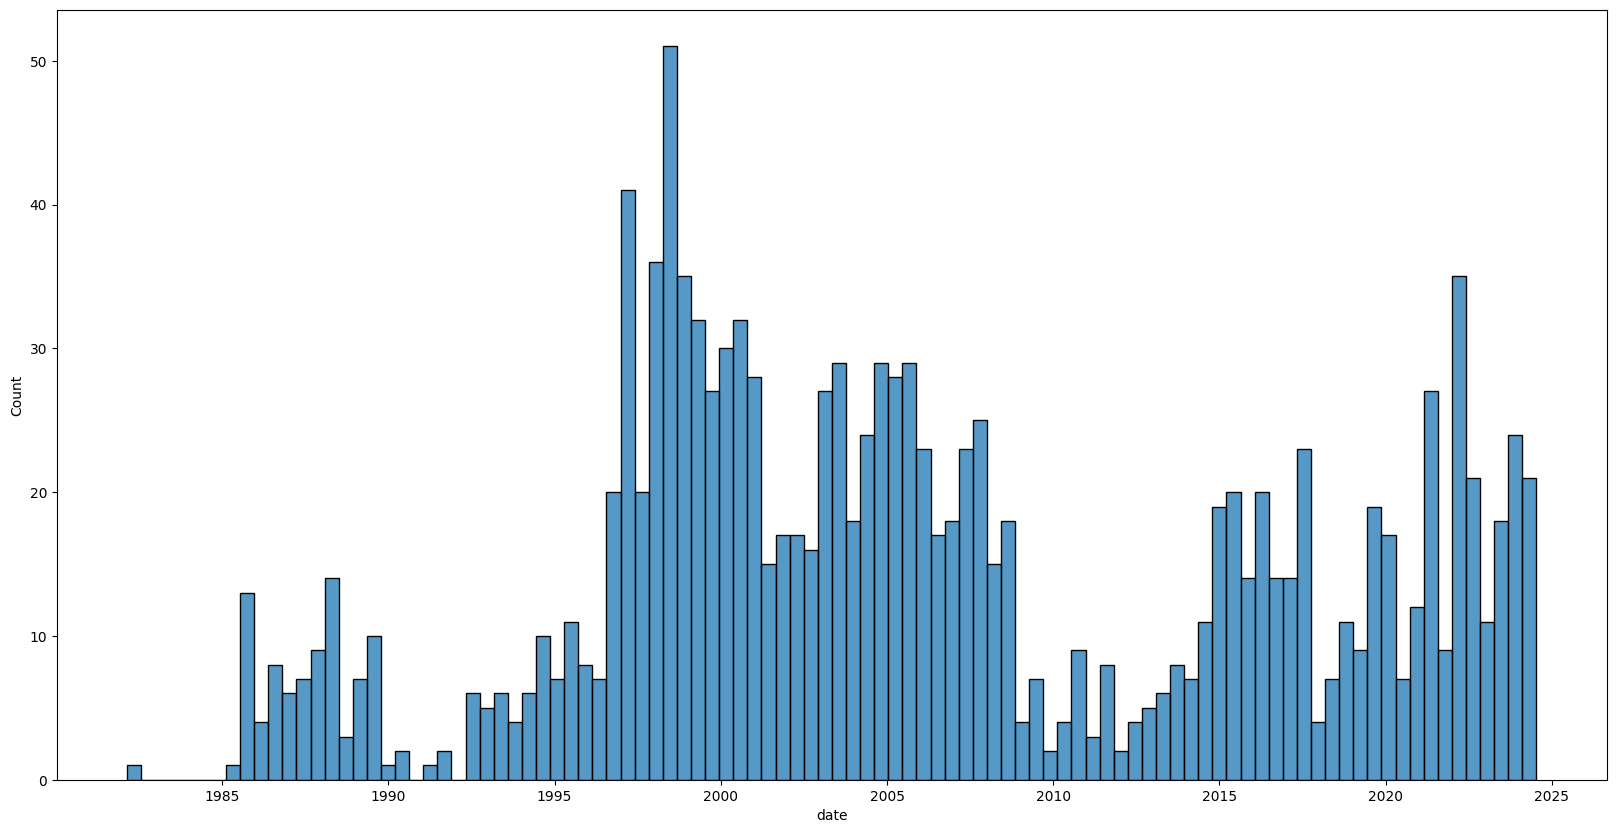

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(to_drop['date'], bins=100)

In [42]:
from pprint import pprint

pprint(to_drop.sample(1).Text.values[0])

("SCOTLAND'S police forces are demanding new powers that would allow them to "
 'store DNA samples from people who have not committed a crime.Chief '
 'constables have written to the Scottish executive seeking permission to keep '
 'genetic fingerprint evidence from those who have been arrested and released '
 'without being charged with an offence.At present, DNA samples can be kept '
 'only if a suspect is subsequently convicted in a Scottish court.Police also '
 'want to keep DNA samples taken from serious juvenile offenders as young as '
 'eight.Similar powers were granted to police forces south of the border last '
 'year.The proposals have been criticised by civil liberties campaigners who '
 'believe that they are an infringement of people\'s rights. "The state has '
 'enough information on us already and the balance is correctly struck at the '
 'moment," said John Scott, spokesman for the Scottish Human Rights '
 'Centre."The police could make a wrongful arrest and that should

In [43]:
hepc_new = hepc.drop(to_drop.index)

In [45]:
hepc_new = hepc_new.reset_index(drop=True)

In [46]:
hepc_new

,Title,date,author,newspaper,Text
0,International Companies: Technology - Pounds 2...,1983-02-11,DAVID FISHLOCK,Financial Times,BRITAIN'S biotechnologists are to have a new P...
1,Financial Times Survey: China - Business - Gro...,1984-10-29,No author in byline,Financial Times,CLIMATENorth China (including Beijing) - Winte...
2,Travel: How to stay healthy on your summer bre...,1985-07-06,ISABEL WALKER,Times,Holidays are one of the 30 most stressful even...
3,Family Money: Taking the sting from jabs / Ino...,1985-08-03,VIVIEN GOLDSMITH,Times,The series of jabs you will need if you are of...
4,A BREAKDOWN OF THE BREAKDOWNS (732),1985-08-14,JOHN GOODBODY,Times,Steve Cram1981Has a winter of injuries.August:...
...,...,...,...,...,...
8086,RISK ASSESS Almost HALF of all cancer cases ar...,2024-07-11,Alice Fuller,thesun.co.uk,"Plus, the most common types of the disease by ..."
8087,FRESH HOPE Iconic British high street chain co...,2024-07-11,Juliana Cruz Lima,thesun.co.uk,Over 100 stores remain at risk unless a buyer ...
8088,"Bill Gates: If you don’t like what I’m doing, ...",2024-07-12,No author in byline,thetimes.co.uk,The Microsoft founder’s message to his critics...
8089,Gangsters muscle in on Scotland’s beauty industry,2024-07-14,David Leask,thetimes.co.uk,The lack of regulation surrounding cosmetic in...


In [47]:
hepc_new.to_csv("hepc_parsed_0826.csv")

# New query for NANBHep

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException, TimeoutException
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
wd = webdriver.Chrome()
wd.get('http://www.library.tufts.edu/ezproxy/ezproxy.asp?LOCATION=RsrcRcrdFactiva')

switch_factiva = WebDriverWait(wd, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'nf-toggle-switch'))
)
switch_factiva.click()

query = """
("Non A Non B" or "Non-A Non-B" or "NonANonB" or "NANBH" or "non A-non B" or (("new strain" or "rare form" or "new type" or "recently discovered type" or "third variant" or "another form") and "hepatitis")) and (rst=st or rst=sundti or rst=t or rst=timeuk or rst=dt or rst=stel or rst=TELUK or rst=ob or rst=IND or rst=INDOP or rst=INDOS or rst=IIND or rst=grdn or rst=GRULTD or rst=ftft or rst=ftcom or rst=thesun or rst=thesuk or rst=daim or rst=mosm or rst=damonl or rst=theexp or rst=thexsu or rst=exco or rst=dmirr or rst=smirr or rst=miruk or rst=POPL or rst=daista or rst=dsun or rst=daico or rst=ns or rst=nsonl or rst=metro)
""".strip()
search_bar = WebDriverWait(wd, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, "css-wiv1jh"))
)
search_bar.send_keys(query + '\n')

In [3]:
dropdowns = WebDriverWait(wd, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'css-4r1vsy'))
)

In [4]:
dropdowns[-1].click()  

In [5]:
date_options = WebDriverWait(wd, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'css-1ttu9ot'))
)

In [6]:
date_options[-2].click()

In [7]:
dropdowns[0].click()

In [8]:
order_options = WebDriverWait(wd, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'css-1ttu9ot'))
)[-1]

In [9]:
order_options.click()

## Post proc

In [1]:
def get_author_name(x):
    x_split = x.split(',')
    for s in x_split:
        if ('By' in s):
            name_newspaper = s.split('By')[1].strip()
            if '  ' in name_newspaper:
                return name_newspaper.split('  ')[0]
            else:
                return name_newspaper
        elif ('BY' in s):
            name_newspaper = s.split('BY')[1].strip()
            if '  ' in name_newspaper:
                return name_newspaper.split('  ')[0]
            else:
                return name_newspaper
        else:
            if '  ' in s:
                return s.split('  ')[0].strip()
            else:
                return 'No author in byline'

In [2]:
uk_papers = [
    "Sunday Times",
    "Times",
    "Daily Telegraph",
    "Observer",
    "Independent",
    "Guardian",
    "Financial Times",
    "Sun",
    "Daily Mail",
    "Daily Express",
    "Daily Mirror",
    "Sunday People",
    "Daily Star",
    "Evening Standard",
    "Metro",
    "Mail on Sunday",
    "Sunday Mirror",
    "Express on Sunday",
    "Sunday Telegraph",
    "Sunday Express",
    "thesun.co.uk",
    "Mail Online",
    "Telegraph Online",
    "Mirror.co.uk",
    "thetimes.co.uk",
    "dailystar.co.uk"
]

def get_paper(x):
    if any([p in x for p in uk_papers]):
        newspaper = re.search(r'\b(?:{})\b'.format('|'.join(uk_papers)), x)
        if newspaper:
            return newspaper.group(0)
        else:
            return 'No UK newspaper found'

In [4]:
import pandas as pd
hepnanb = pd.read_csv('hepatitis_nanb_articles.csv')

In [7]:
import re
hepnanb['date'] = hepnanb.apply(lambda x: re.search(r'\d{1,2}\s+\w+\s+\d{4}', x['Byline']).group(0), axis=1)
hepnanb['date'] = pd.to_datetime(hepnanb['date'], format='%d %B %Y')
hepnanb = hepnanb.sort_values(by='date')

In [9]:
hepnanb['author'] = hepnanb.Byline.apply(get_author_name)
hepnanb['newspaper'] = hepnanb.Byline.apply(get_paper)

In [12]:
hepnanb = hepnanb.drop_duplicates()
hepnanb

,Title,Byline,Text,date,author,newspaper
0,Special Report on Public Health (8): The battl...,"By PHILIPPA TOOMEY The Times, 11 December 19...","Lassa fever is the great frightener but, as Dr...",1985-12-11,PHILIPPA TOOMEY,Times
1,\nThe Department of Health has approved the ma...,"The Evening Standard, 26 March 1986, 47 words,...",\nWellferon is based on interferon. It is now ...,1986-03-26,No author in byline,Evening Standard
2,'Donate blood before surgery' (180),"By PEARCE WRIGHT, Science Editor The Times, ...",Patients waiting for an operation should bank ...,1987-01-16,PEARCE WRIGHT,Times
3,"Sport: The high, reckless price of being a sup...","By ROB HUGHES The Sunday Times, 7 June 1987,...",ASK Steve Ovett whether he enjoys the supreme ...,1987-06-07,ROB HUGHES,Sunday Times
4,Health (Medical Briefing): Hepatitis hazard (535),"By Dr THOMAS STUTTAFORD The Times, 5 May 198...",Reports of Russell Harty's acute liver failure...,1988-05-05,Dr THOMAS STUTTAFORD,Times
...,...,...,...,...,...,...
379,What is the UK’s infected blood scandal?,"Jamie Grierson The Guardian, 20 May 2024, 5:...","More than 3,000 people died and many others we...",2024-05-20,Jamie Grierson,Guardian
371,Urgent warning over rare cancer rise with fear...,"Richard Ashmore express.co.uk, 9 June 2024, ...",Experts have seen an increase in certain kinds...,2024-06-09,Richard Ashmore,None
382,History's most evil experiments: From Josef Me...,"Chris Jewers Mail Online, 7 July 2024, 2:53 ...",* WARNING: Contains graphic images and descrip...,2024-07-07,Chris Jewers,Mail Online
373,Mpox virus - updates: WHO declares outbreak a ...,"Salma Ouaguira Independent Online, 20 August...",Health ministers are on high alert for UK case...,2024-08-20,Salma Ouaguira,Independent


In [14]:
hepnanb = hepnanb[~hepnanb['Text'].str.contains('mpox')]

In [15]:
hepnanb.to_csv("hepnanb_parsed_0904.csv")